In [35]:
import pandas as pd
import matplotlib.pyplot as plot
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
df2 = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis =1)


In [38]:
cols = df2.columns.tolist()
cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [39]:
cols = cols[1:] + cols[:1]
df2 = df2[cols]
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [40]:
df2['Sex'] = (df2['Sex'].str.startswith("male").astype(int))


In [41]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [42]:
df2.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

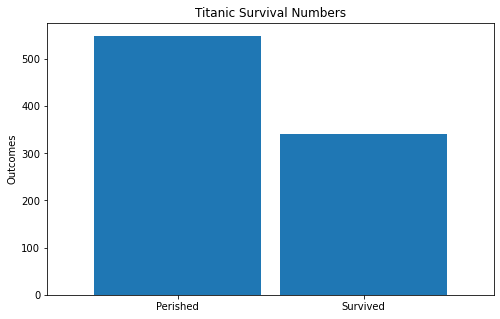

In [43]:
othernames = {0:"Perished",1:"Survived"}
chart = df2['Survived'].value_counts().rename(index=othernames)
chart
chart.plot.bar(ylabel='Outcomes', title='Titanic Survival Numbers', rot =0, width = .9, figsize = (8,5))
plot.show()

In [44]:
df_dependvar = df2.drop(['Survived'], axis =1)
data1 = df_dependvar.mean()
data1

Pclass     2.308642
Sex        0.647587
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64

In [45]:
data = df2.groupby(df2['Survived']).mean()
data

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [46]:
datatranspose = data.T
datatranspose

Survived,0,1
Pclass,2.531876,1.950292
Sex,0.852459,0.318713
Age,30.626179,28.343690
SibSp,0.553734,0.473684
Parch,0.329690,0.464912
Fare,22.117887,48.395408


In [47]:
totalmean = df[["Pclass","Sex","Age","SibSp","Parch", "Fare"]].mean()
datatranspose['All Passenger Average'] = data1
datatranspose

Survived,0,1,All Passenger Average
Pclass,2.531876,1.950292,2.308642
Sex,0.852459,0.318713,0.647587
Age,30.626179,28.343690,29.699118
SibSp,0.553734,0.473684,0.523008
Parch,0.329690,0.464912,0.381594
Fare,22.117887,48.395408,32.204208


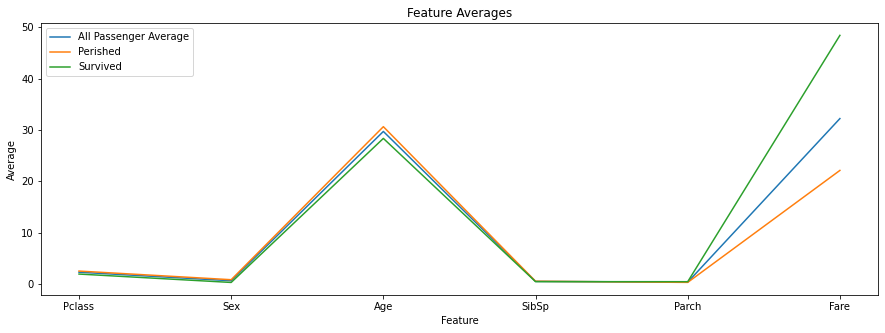

In [48]:
plot.figure(figsize=(15,5))
plot.plot(datatranspose['All Passenger Average'], label='All Passenger Average')
plot.plot(datatranspose[0],label='Perished')
plot.plot(datatranspose[1],label='Survived')
plot.title('Feature Averages')
plot.xlabel('Feature')
plot.ylabel('Average')
plot.legend()
plot.show()


In [49]:
dfAll = pd.DataFrame(datatranspose)
dfAll['Total'] = dfAll['All Passenger Average']
dfAll['Perished'] = dfAll[0]
dfAll['Survived'] = dfAll[1]
dfAll= dfAll.drop([0,1,'All Passenger Average'], axis=1)
dfAll

Survived,Total,Perished,Survived
Pclass,2.308642,2.531876,1.950292
Sex,0.647587,0.852459,0.318713
Age,29.699118,30.626179,28.343690
SibSp,0.523008,0.553734,0.473684
Parch,0.381594,0.329690,0.464912
Fare,32.204208,22.117887,48.395408


In [50]:
df1 = dfAll.iloc[0]
df1 = pd.DataFrame(df1)
df1 = df1.T
#df1.plot.bar(title="Pclass")
dfg2 = dfAll.iloc[1]
dfg2 = pd.DataFrame(dfg2)
dfg2 = dfg2.T
#df2.plot.bar(title="Sex")
df3 = dfAll.iloc[2]
df3 = pd.DataFrame(df3)
df3 = df3.T
#df3.plot.bar(title="Age")
df4 = dfAll.iloc[3]
df4 = pd.DataFrame(df4)
df4 = df4.T
#df4
df5 = dfAll.iloc[4]
df5 = pd.DataFrame(df5)
df5 = df5.T
#df5
df6 = dfAll.iloc[5]
df6 = pd.DataFrame(df6)
df6 = df6.T



In [51]:
#dftt = df1.T
#df1.plot.bar(title="Ticket Class - 1st, 2nd, 3rd", width=4, legend=None, xlabel = None)

#dftt.plot.bar(title="Ticket Class - 1st, 2nd, 3rd", width=4, legend=None, xlabel = None)


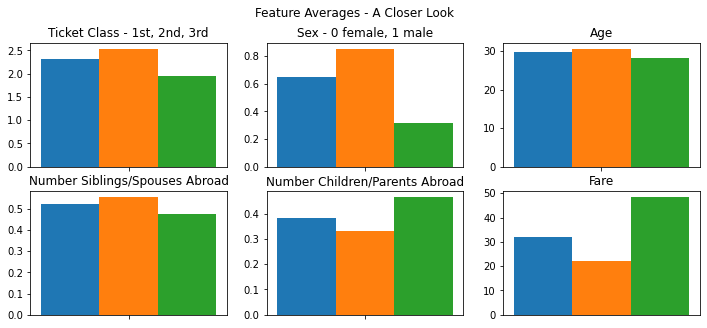

In [53]:
df_list = [df1, df2, df3, df4, df5, df6]
nrows = 2
ncols = 3
fig, ax = plot.subplots(nrows, ncols, figsize = (12,5))
plot.tick_params(axis = "x", which = "both", bottom = False, top = False)

d1 = df1.plot.bar(ax=ax[0,0],title="Ticket Class - 1st, 2nd, 3rd", width=4, legend=None)
d2 = dfg2.plot.bar(ax=ax[0,1],title="Sex - 0 female, 1 male", width=4, legend=None)
d3 = df3.plot.bar(ax=ax[0,2],title="Age", width=4, legend=None)
d4 = df4.plot.bar(ax=ax[1,0],title="Number Siblings/Spouses Abroad", width=4, legend=None)
d5 = df5.plot.bar(ax=ax[1,1],title="Number Children/Parents Abroad", width=4,legend=None)
d6 = df6.plot.bar(ax=ax[1,2],title="Fare", width=4,legend=None)
d1.set(xticklabels=[])
d1.set(xlabel=None)
d2.set(xticklabels=[])
d3.set(xticklabels=[])
d4.set(xticklabels=[])
d5.set(xticklabels=[])
d6.set(xticklabels=[])



plot.suptitle('Feature Averages - A Closer Look')
plot.show()

In [54]:
corr = df2.corr()
corr = corr.drop(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"], axis = 1)
corr = corr.drop(index = "Survived")
corr

,Survived
Pclass,-0.338481
Sex,-0.543351
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


In [55]:
sp = df2.drop(["Pclass", "Sex", "SibSp", "Parch"], axis = 1)
sp
purple = sp.where(df["Survived"] == 0)
purple = purple.dropna()
purple
yellow = sp.where(df["Survived"] == 1)
yellow = yellow.dropna()
yellow


,Age,Fare,Survived
1,38.0,71.2833,1.0
2,26.0,7.9250,1.0
3,35.0,53.1000,1.0
8,27.0,11.1333,1.0
9,14.0,30.0708,1.0
...,...,...,...
875,15.0,7.2250,1.0
879,56.0,83.1583,1.0
880,25.0,26.0000,1.0
887,19.0,30.0000,1.0


In [56]:
purple

,Age,Fare,Survived
0,22.0,7.2500,0.0
4,35.0,8.0500,0.0
6,54.0,51.8625,0.0
7,2.0,21.0750,0.0
12,20.0,8.0500,0.0
...,...,...,...
883,28.0,10.5000,0.0
884,25.0,7.0500,0.0
885,39.0,29.1250,0.0
886,27.0,13.0000,0.0


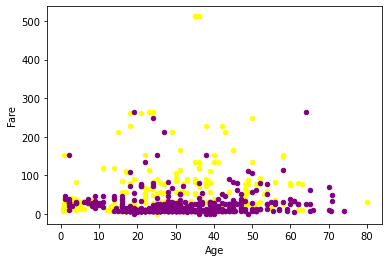

In [57]:
ax1 = yellow.plot(kind="scatter", x= "Age", y = "Fare", color="yellow")
purple.plot(kind="scatter", x= "Age", y = "Fare", color="purple", ax=ax1 )
plot.show()
#I found the ax=ax1 on github to solve my problem!